In [1]:
import numpy as np
import random
import math
import heapq
import multiprocess as mp
import talib as ta
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from datetime import datetime,date
import time
from island_ga import IslandGGA 
from chromosome import Chromosome 
from data_preprocessing import Data
import itertools
import yfinance as yf
import datetime

[*********************100%***********************]  1 of 1 completed


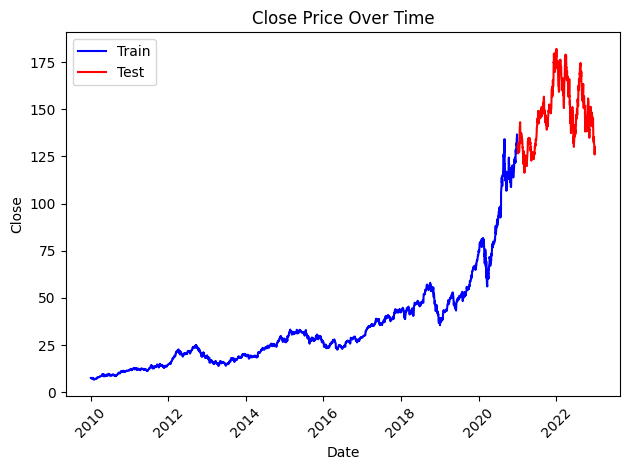

In [20]:
start_date = datetime.datetime(2010, 1, 1)
end_date = datetime.datetime(2022, 12, 31)
data = Data('AAPL',start_date,end_date,2021)
data.data_preprocess()

In [5]:
#total return training 
import matplotlib.pyplot as plt

fitness_values = {"ring":[],"multikuti":[],"master_slave":[],"gga":[]}
speed_values =  {"ring":[],"multikuti":[],"master_slave":[],"gga":[]}
profit = {"ring":[],"multikuti":[],"master_slave":[],"gga":[]}
test_profit = {"Propsed 1(ring)":[],"multikuti":[],"master_slave":[],"gga":[]}
risk = {"ring":[],"multikuti":[],"master_slave":[],"gga":[]}
evolve_strategy =["ring", "multikuti","master_slave","gga"]

for i in evolve_strategy:
    for j in range(50):
        start = time.time()
        ga = IslandGGA(data=data.train_data,num_islands=8,m_iter=15,num_iter=50,n_migrants=10,pSize=200,r_cross=0.4,r_mut=0.1,strategies=data.strategies,evolve_strategy=i)
        ga.evolve()
        end = time.time()
        processing_time=end - start
        speed_values[i].append(processing_time)
        ### USE TRAIN DATA? 
        fitness_values[i].append(ga.globalBest.fitness_value)
        profit[i].append(ga.globalBest.profit)
        risk[i].append(ga.globalBest.corr)
        ### USE TEST DATA HERE? 
        ga.globalBest.calculate_chromosome_fitness(data.test_data,1000)
        fitness_values[i].append(ga.globalBest.fitness_value)
        test_profit[i].append(ga.globalBest.profit)



# Combine the fitness data into a list
fitness_data = [fitness_values[i] for i in  evolve_strategy]

# Create a fitness box plot
fig, ax = plt.subplots()
ax.boxplot(fitness_data)

# Set the x-axis tick labels
ax.set_xticklabels(['Ring', 'Multikuti','Master Slave','GGA'])

# Set the y-axis label
ax.set_ylabel('Fitness Values')

# Set the title of the plot
ax.set_title('Fitnes Value')

# Show the plot
plt.show()

#### TIME PLOT
# Combine the fitness data into a list
speed_data = [speed_values[i] for i in  evolve_strategy]

# Create a fitness box plot
fig, ax = plt.subplots()
ax.boxplot(speed_data)

# Set the x-axis tick labels
ax.set_xticklabels(['Ring', 'Multikuti','Master Slave','GGA'])

# Set the y-axis label
ax.set_ylabel('Time (seconds)')

# Set the title of the plot
ax.set_title('Processing Time')

# Show the plot
plt.show()
#### profit
# Combine the fitness data into a list
profit_data = [profit[i] for i in  evolve_strategy]

# Create a fitness box plot
fig, ax = plt.subplots()
ax.boxplot(profit_data)

# Set the x-axis tick labels
ax.set_xticklabels(['Ring', 'Multikuti','Master Slave','GGA'])

# Set the y-axis label
ax.set_ylabel('Profit')

# Set the title of the plot
ax.set_title('Profitability')

# Show the plot
plt.show()
#### profit
# Combine the fitness data into a list
risk_data = [risk[i] for i in  evolve_strategy]

# Create a fitness box plot
fig, ax = plt.subplots()
ax.boxplot(risk_data)

# Set the x-axis tick labels
ax.set_xticklabels(['Ring', 'Multikuti','Master Slave','GGA'])

# Set the y-axis label
ax.set_ylabel('Correlation')

# Set the title of the plot
ax.set_title('Correlation')

# Show the plot
plt.show()

Running ring


AttributeError: 'Pandas' object has no attribute 'date'

Running ring
GENERATION 0 START
Generation 0: Best fitness = 296.50138134716553 Average Fitness = 160.90607419782793
GENERATION 0 END
GENERATION 1 START
Generation 1: Best fitness = 296.50138134716553 Average Fitness = 195.03801924248302
GENERATION 1 END
GENERATION 2 START
Generation 2: Best fitness = 296.50138134716553 Average Fitness = 218.796566168697
GENERATION 2 END
GENERATION 3 START
Generation 3: Best fitness = 307.1143202429411 Average Fitness = 234.4323330345456
GENERATION 3 END
GENERATION 4 START
Generation 4: Best fitness = 328.8765962250225 Average Fitness = 238.56898445068327
GENERATION 4 END
Running multikuti
GENERATION 0 START
Generation 0: Best fitness = 306.0601082724542 Average Fitness = 214.13402153326857
GENERATION 0 END
GENERATION 1 START
Generation 1: Best fitness = 311.49277205438773 Average Fitness = 242.93663804969577
GENERATION 1 END
GENERATION 2 START
Generation 2: Best fitness = 311.49277205438773 Average Fitness = 229.96788876833884
GENERATION 2 END
GENERAT

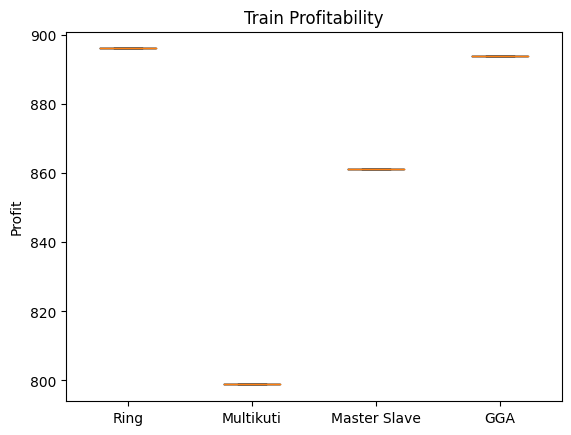

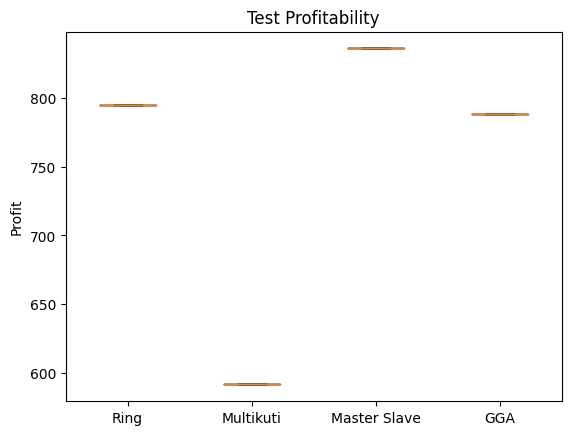

In [4]:
#total return Testing data
import matplotlib.pyplot as plt

fitness_values = {"ring":[],"multikuti":[],"master_slave":[],"gga":[]}
profit = {"ring":[],"multikuti":[],"master_slave":[],"gga":[]}
test_profit = {"ring":[],"multikuti":[],"master_slave":[],"gga":[]}
risk = {"ring":[],"multikuti":[],"master_slave":[],"gga":[]}
evolve_strategy =["ring", "multikuti","master_slave","gga"]

for i in evolve_strategy:  
    ga = IslandGGA(data=data.train_data,num_islands=8,m_iter=150,num_iter=5,n_migrants=1,pSize=20,r_cross=0.4,r_mut=0.1,strategies=data.strategies,evolve_strategy=i)
    ga.evolve()
    profit[i].append(ga.globalBest.profit)
    ### USE TEST DATA HERE? 
    ga.globalBest.calculate_chromosome_fitness(data.test_data,1000)
    fitness_values[i].append(ga.globalBest.fitness_value)
    test_profit[i].append(ga.globalBest.profit)

#
#### profit
# Combine the fitness data into a list
profit_data = [profit[i] for i in  evolve_strategy]

# Create a fitness box plot
fig, ax = plt.subplots()
ax.boxplot(profit_data)

# Set the x-axis tick labels
ax.set_xticklabels(['Ring', 'Multikuti','Master Slave','GGA'])

# Set the y-axis label
ax.set_ylabel('Profit')

# Set the title of the plot
ax.set_title('Train Profitability')

# Show the plot
plt.show()
#### profit
#### profit
# Combine the fitness data into a list
test_profit_data = [test_profit[i] for i in  evolve_strategy]

# Create a fitness box plot
fig, ax = plt.subplots()
ax.boxplot(test_profit_data)

# Set the x-axis tick labels
ax.set_xticklabels(['Ring', 'Multikuti','Master Slave','GGA'])

# Set the y-axis label
ax.set_ylabel('Profit')

# Set the title of the plot
ax.set_title('Test Profitability')

# Show the plot
plt.show()
#### profit
